In [1]:
# Cell 1: Setup and load cleaned data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("AIRPORT DELAYS ANALYSIS - VISUALIZATION & INSIGHTS")
print("="*80)

#Load Cleaned Data
print("\nLoading cleaned data...")
df = pd.read_csv('../data/processed/flights_clean.csv')

print(f" Loaded {len(df):,} flights")
print(f"Columns: {len(df.columns)}")
print(f"\nDataset covers:")
print(f"  - Year: {df['YEAR'].unique()}")
print(f"  - Months: {df['MONTH'].min()} to {df['MONTH'].max()}")
print(f"  - Airlines: {df['AIRLINE'].nunique()}")
print(f"  - Airports: {df['ORIGIN_AIRPORT'].nunique()}")


AIRPORT DELAYS ANALYSIS - VISUALIZATION & INSIGHTS

Loading cleaned data...


 Loaded 5,729,195 flights
Columns: 14

Dataset covers:
  - Year: [2015]
  - Months: 1 to 12
  - Airlines: 14
  - Airports: 932


In [2]:
# Cell 2: High-level metrics

print("OVERALL FLIGHT DELAY STATISTICS")
print("="*80)

total_flights = len(df)
delayed_flights = (df['ARRIVAL_DELAY'] > 15).sum()
delay_rate = (delayed_flights / total_flights) * 100

print(f"Total flights analyzed: {total_flights:,}")
print(f"Delayed flights (>15 min): {delayed_flights:,}")
print(f"Overall delay rate: {delay_rate:.2f}%")

print(f"\nDelay Metrics:")
print(f"  Average delay: {df['ARRIVAL_DELAY'].mean():.2f} minutes")
print(f"  Median delay: {df['ARRIVAL_DELAY'].median():.2f} minutes")
print(f"  Std deviation: {df['ARRIVAL_DELAY'].std():.2f} minutes")
print(f"  Max delay: {df['ARRIVAL_DELAY'].max():.0f} minutes ({df['ARRIVAL_DELAY'].max()/60:.1f} hours)")

# Create delay categories
def categorize_delay(delay):
    if delay <= 0:
        return 'On Time/Early'
    elif delay <= 15:
        return 'Minor Delay (1-15 min)'
    elif delay <= 30:
        return 'Moderate Delay (16-30 min)'
    elif delay <= 60:
        return 'Significant Delay (31-60 min)'
    else:
        return 'Major Delay (>60 min)'

df['DELAY_CATEGORY'] = df['ARRIVAL_DELAY'].apply(categorize_delay)

print("\n" + "="*80)
print("DELAY CATEGORY BREAKDOWN:")
print("="*80)
category_counts = df['DELAY_CATEGORY'].value_counts()
for category, count in category_counts.items():
    pct = (count / total_flights) * 100
    print(f"  {category:25s}: {count:,} ({pct:.2f}%)")

OVERALL FLIGHT DELAY STATISTICS
Total flights analyzed: 5,729,195
Delayed flights (>15 min): 1,023,498
Overall delay rate: 17.86%

Delay Metrics:
  Average delay: 4.40 minutes


  Median delay: -5.00 minutes
  Std deviation: 39.22 minutes
  Max delay: 1971 minutes (32.9 hours)



DELAY CATEGORY BREAKDOWN:
  On Time/Early            : 3,642,299 (63.57%)
  Minor Delay (1-15 min)   : 1,063,398 (18.56%)
  Moderate Delay (16-30 min): 390,801 (6.82%)
  Major Delay (>60 min)    : 319,092 (5.57%)
  Significant Delay (31-60 min): 313,605 (5.47%)


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


Creating Visualization 1: Delay Distribution


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


✓ Saved: ../reports/figures/01_delay_distribution.png


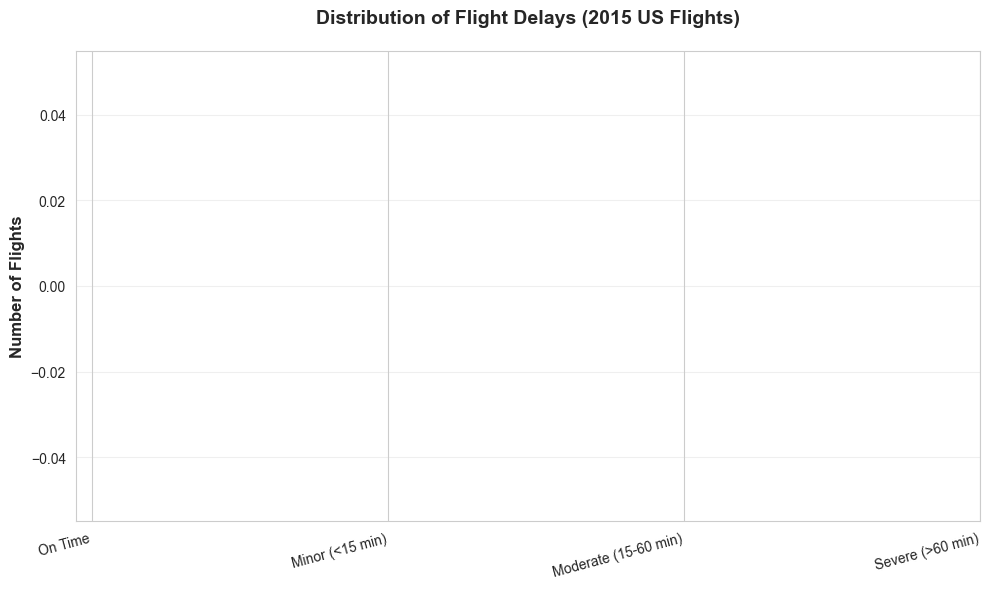

In [3]:
# Cell 3: Chart 1 - Delay category distribution (FIXED)

import os
os.makedirs('../reports/figures', exist_ok=True)

print("Creating Visualization 1: Delay Distribution")
print("="*80)

fig, ax = plt.subplots(figsize=(10, 6))

delay_counts = df['DELAY_CATEGORY'].value_counts()
category_order = ['On Time', 'Minor (<15 min)', 'Moderate (15-60 min)', 'Severe (>60 min)']
delay_counts = delay_counts.reindex(category_order)

# Use simple color names instead of hex
colors = ['green', 'gold', 'orange', 'red']
bars = ax.bar(range(len(delay_counts)), delay_counts.values, 
              color=colors, edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(delay_counts)))
ax.set_xticklabels(delay_counts.index, rotation=15, ha='right')
ax.set_ylabel('Number of Flights', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Flight Delays (2015 US Flights)', 
             fontsize=14, fontweight='bold', pad=20)

for i, (bar, value) in enumerate(zip(bars, delay_counts.values)):
    height = bar.get_height()
    percentage = (value / len(df)) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + 50000,
            f'{value:,}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

output_path = '../reports/figures/01_delay_distribution.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {output_path}")
plt.show()

Matplotlib backend: module://matplotlib_inline.backend_inline


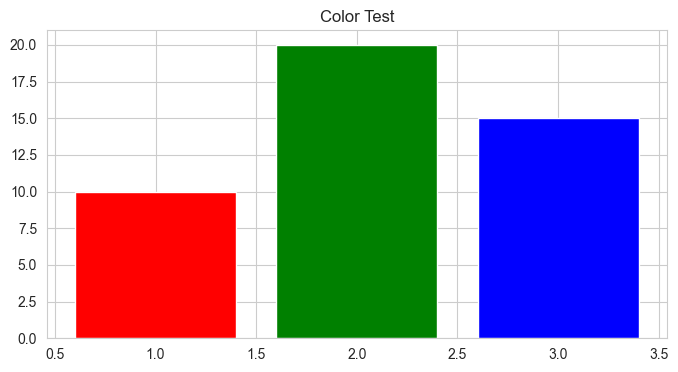

Check color_test.png - do you see red, green, blue bars?


In [4]:
# Test cell - verify matplotlib backend

import matplotlib
print(f"Matplotlib backend: {matplotlib.get_backend()}")

# Simple color test
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar([1, 2, 3], [10, 20, 15], color=['red', 'green', 'blue'])
ax.set_title('Color Test')
plt.savefig('../reports/figures/color_test.png', dpi=300)
plt.show()
print("Check color_test.png - do you see red, green, blue bars?")

Creating Visualization 2: Worst Airports by Delay Rate


✓ Saved: ../reports/figures/02_worst_airports.png

Top 10 Worst Airports:
Airport  Delay_Rate  Total_Flights
    ASE   28.697505           3286
    HPN   23.799553           7164
    ORD   23.312877         277336
    EGE   23.255814           1204
    LBE   23.212851           1245
    LGA   23.188253          95074
    TTN   23.137819           2779
    ACV   22.379827           1269
    MIA   22.287698          68558
    CRW   22.226999           2326


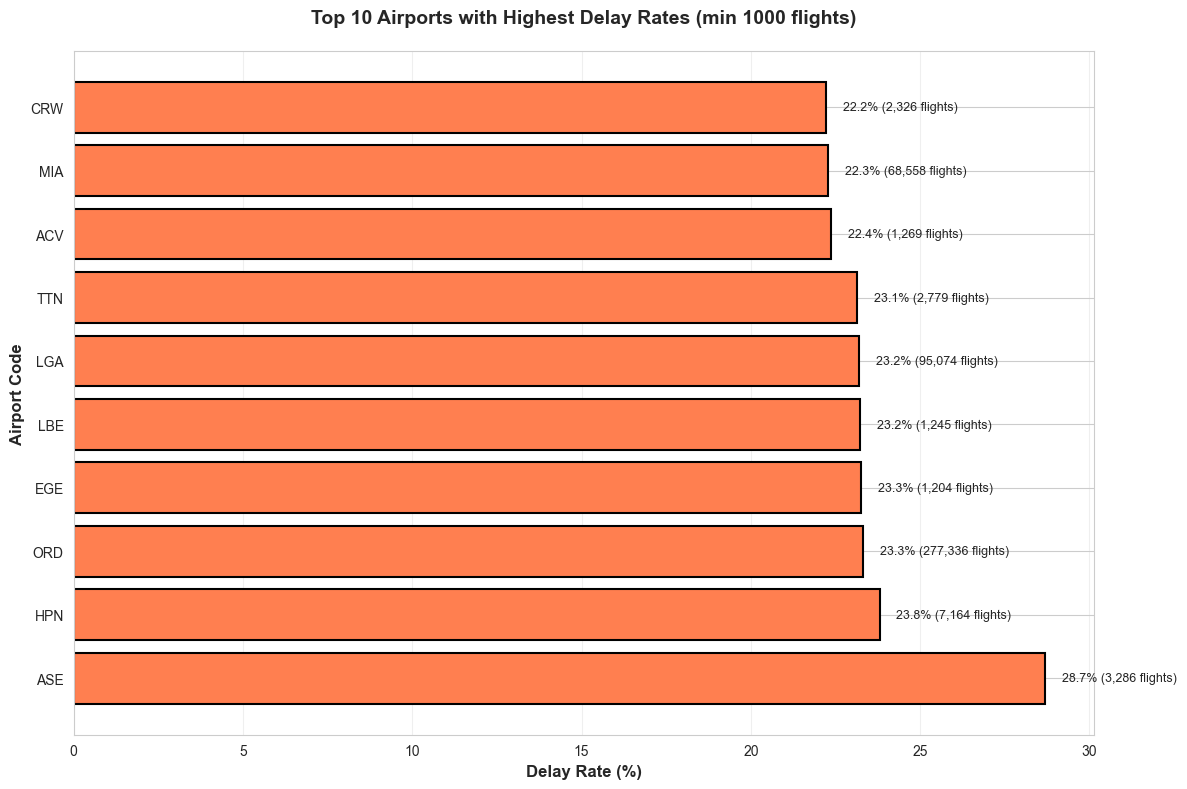

In [5]:
# Cell 4: Chart 2 - Airports with highest delay rates

print("Creating Visualization 2: Worst Airports by Delay Rate")
print("="*80)

# Calculate delay rate by origin airport
# Create temporary IS_DELAYED column for aggregation
df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

airport_stats = df.groupby('ORIGIN_AIRPORT').agg({
    'IS_DELAYED': ['sum', 'count']
}).reset_index()

airport_stats.columns = ['Airport', 'Delayed_Flights', 'Total_Flights']
airport_stats['Delay_Rate'] = (airport_stats['Delayed_Flights'] / 
                                airport_stats['Total_Flights'] * 100)

# Filter: only airports with at least 1000 flights (statistical significance)
airport_stats = airport_stats[airport_stats['Total_Flights'] >= 1000]

# Get top 10 worst
top_10_worst = airport_stats.nlargest(10, 'Delay_Rate')

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

y_pos = range(len(top_10_worst))
ax.barh(y_pos, top_10_worst['Delay_Rate'], color='coral', edgecolor='black', linewidth=1.5)

ax.set_yticks(y_pos)
ax.set_yticklabels(top_10_worst['Airport'])
ax.set_xlabel('Delay Rate (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Airport Code', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Airports with Highest Delay Rates (min 1000 flights)', 
             fontsize=14, fontweight='bold', pad=20)

# Add value labels
for i, (rate, total) in enumerate(zip(top_10_worst['Delay_Rate'].values, 
                                       top_10_worst['Total_Flights'].values)):
    ax.text(rate + 0.5, i, f'{rate:.1f}% ({total:,} flights)', 
            va='center', fontsize=9)

ax.grid(axis='x', alpha=0.3)
plt.tight_layout()

output_path = '../reports/figures/02_worst_airports.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {output_path}")

print("\nTop 10 Worst Airports:")
print(top_10_worst[['Airport', 'Delay_Rate', 'Total_Flights']].to_string(index=False))

plt.show()

Creating Visualization 3: Airline Performance Comparison


✓ Saved: ../reports/figures/03_airline_performance.png

Airline Rankings (worst to best):
Airline  Delay_Rate  Avg_Delay  Total_Flights
     NK   28.746262  14.448971         115375
     F9   25.320229  12.482814          90248
     B6   21.789612   6.659309         262772
     MQ   20.966213   6.439027         279607
     UA   19.896494   5.416787         509150
     EV   18.919040   6.561793         556746
     VX   18.491421   4.728364          61369
     WN   18.246493   4.362992        1245812
     OO   17.954920   5.829694         578393
     US   17.945214   3.698117         194648
     AA   17.514212   3.441091         715065
     DL   12.970712   0.186372         872057
     AS   12.314084  -0.974216         171852
     HA   10.525486   2.021498          76101


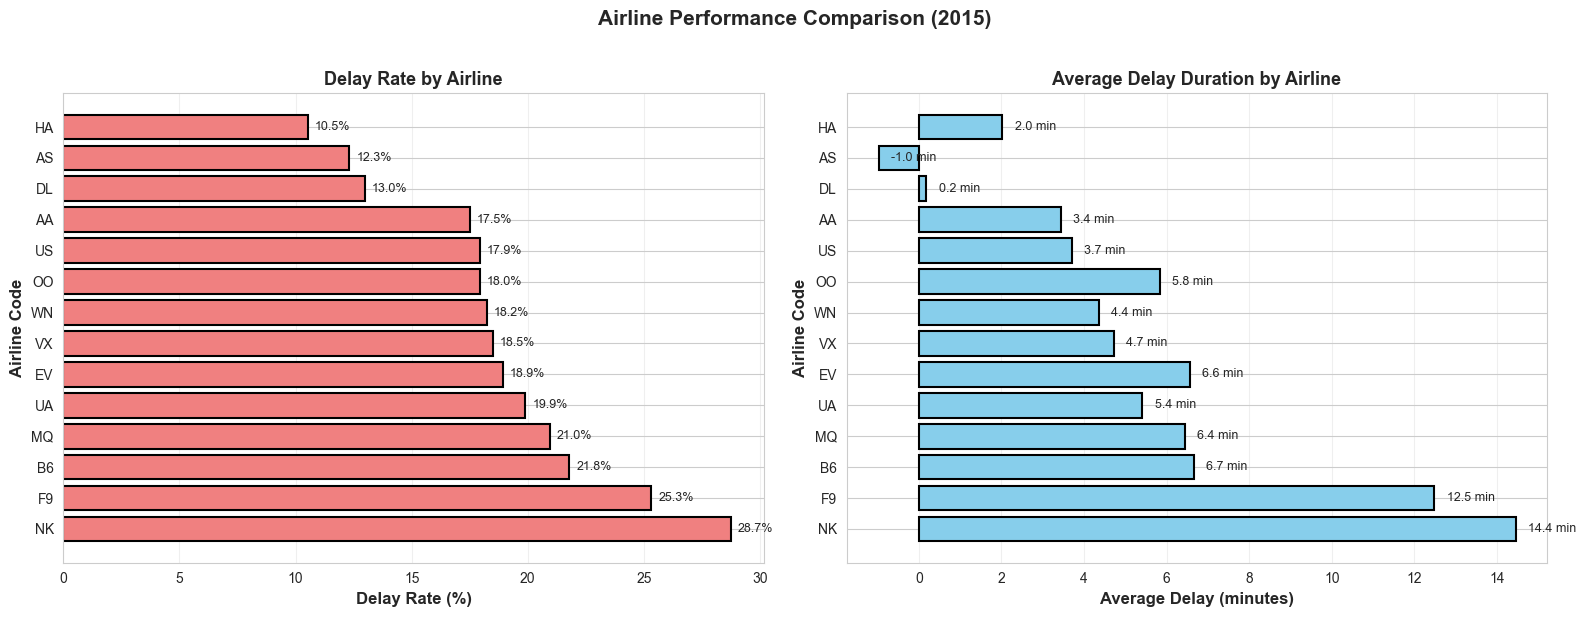

In [6]:
# Cell 5: Chart 3 - Airline performance comparison

print("Creating Visualization 3: Airline Performance Comparison")
print("="*80)

# Calculate metrics by airline
airline_stats = df.groupby('AIRLINE').agg({
    'IS_DELAYED': ['sum', 'count'],
    'ARRIVAL_DELAY': 'mean'
}).reset_index()

airline_stats.columns = ['Airline', 'Delayed_Flights', 'Total_Flights', 'Avg_Delay']
airline_stats['Delay_Rate'] = (airline_stats['Delayed_Flights'] / 
                               airline_stats['Total_Flights'] * 100)

# Sort by delay rate
airline_stats = airline_stats.sort_values('Delay_Rate', ascending=False)

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Delay Rate
y_pos = range(len(airline_stats))
ax1.barh(y_pos, airline_stats['Delay_Rate'], color='lightcoral', 
         edgecolor='black', linewidth=1.5)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(airline_stats['Airline'])
ax1.set_xlabel('Delay Rate (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Airline Code', fontsize=12, fontweight='bold')
ax1.set_title('Delay Rate by Airline', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, rate in enumerate(airline_stats['Delay_Rate'].values):
    ax1.text(rate + 0.3, i, f'{rate:.1f}%', va='center', fontsize=9)

# Chart 2: Average Delay (minutes)
ax2.barh(y_pos, airline_stats['Avg_Delay'], color='skyblue', 
         edgecolor='black', linewidth=1.5)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(airline_stats['Airline'])
ax2.set_xlabel('Average Delay (minutes)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Airline Code', fontsize=12, fontweight='bold')
ax2.set_title('Average Delay Duration by Airline', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, delay in enumerate(airline_stats['Avg_Delay'].values):
    ax2.text(delay + 0.3, i, f'{delay:.1f} min', va='center', fontsize=9)

plt.suptitle('Airline Performance Comparison (2015)', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()

output_path = '../reports/figures/03_airline_performance.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {output_path}")

print("\nAirline Rankings (worst to best):")
print(airline_stats[['Airline', 'Delay_Rate', 'Avg_Delay', 'Total_Flights']].to_string(index=False))

plt.show()

Creating Visualization 4: Delays by Time of Day


✓ Saved: ../reports/figures/04_time_of_day_delays.png

Delay Rates by Time of Day:
         Time_Period  Delay_Rate   Total
  Morning (5am-12pm)   12.186257 2347505
Afternoon (12pm-5pm)   19.539701 1725487
   Evening (5pm-9pm)   24.784483 1290848
     Night (9pm-5am)   21.989572  365355


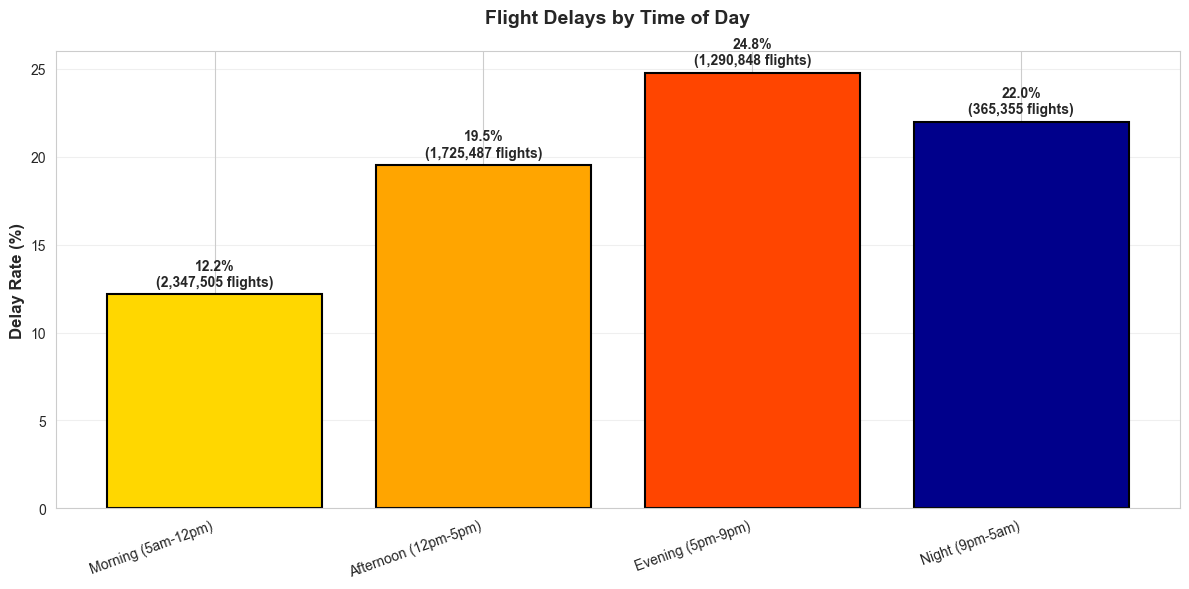

In [7]:
# Cell 6: Chart 4 - Time of day patterns

print("Creating Visualization 4: Delays by Time of Day")
print("="*80)

# Create TIME_OF_DAY column based on scheduled departure hour
def categorize_time_of_day(scheduled_dep):
    hour = int(scheduled_dep) // 100  # Extract hour from HHMM format
    if 5 <= hour < 12:
        return 'Morning (5am-12pm)'
    elif 12 <= hour < 17:
        return 'Afternoon (12pm-5pm)'
    elif 17 <= hour < 21:
        return 'Evening (5pm-9pm)'
    else:
        return 'Night (9pm-5am)'

df['TIME_OF_DAY'] = df['SCHEDULED_DEPARTURE'].apply(categorize_time_of_day)

# Calculate delay rate by time of day
time_stats = df.groupby('TIME_OF_DAY').agg({
    'IS_DELAYED': ['sum', 'count']
}).reset_index()

time_stats.columns = ['Time_Period', 'Delayed', 'Total']
time_stats['Delay_Rate'] = (time_stats['Delayed'] / time_stats['Total'] * 100)

# Order by time of day
time_order = ['Morning (5am-12pm)', 'Afternoon (12pm-5pm)', 
              'Evening (5pm-9pm)', 'Night (9pm-5am)']
time_stats = time_stats.set_index('Time_Period').reindex(time_order).reset_index()

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['gold', 'orange', 'orangered', 'darkblue']
bars = ax.bar(range(len(time_stats)), time_stats['Delay_Rate'], 
              color=colors, edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(time_stats)))
ax.set_xticklabels(time_stats['Time_Period'], rotation=20, ha='right')
ax.set_ylabel('Delay Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Flight Delays by Time of Day', fontsize=14, fontweight='bold', pad=20)

# Add value labels
for i, (bar, rate, total) in enumerate(zip(bars, time_stats['Delay_Rate'].values, 
                                            time_stats['Total'].values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{rate:.1f}%\n({total:,} flights)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.grid(axis='y', alpha=0.3)
plt.tight_layout()

output_path = '../reports/figures/04_time_of_day_delays.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {output_path}")

print("\nDelay Rates by Time of Day:")
print(time_stats[['Time_Period', 'Delay_Rate', 'Total']].to_string(index=False))

plt.show()

Creating Visualization 5: Seasonal Delay Trends


✓ Saved: ../reports/figures/05_seasonal_trends.png

Monthly Delay Rates:
  Jan: 20.18% (457,986.0 flights)
  Feb: 22.46% (408,674.0 flights)
  Mar: 18.60% (493,310.0 flights)
  Apr: 16.39% (480,631.0 flights)
  May: 17.58% (491,299.0 flights)
  Jun: 22.64% (494,777.0 flights)
  Jul: 20.15% (515,912.0 flights)
  Aug: 17.95% (505,484.0 flights)
  Sep: 12.43% (462,871.0 flights)
  Oct: 11.83% (483,711.0 flights)
  Nov: 14.58% (463,373.0 flights)
  Dec: 19.80% (471,167.0 flights)

Best month: Oct
Worst month: Jun


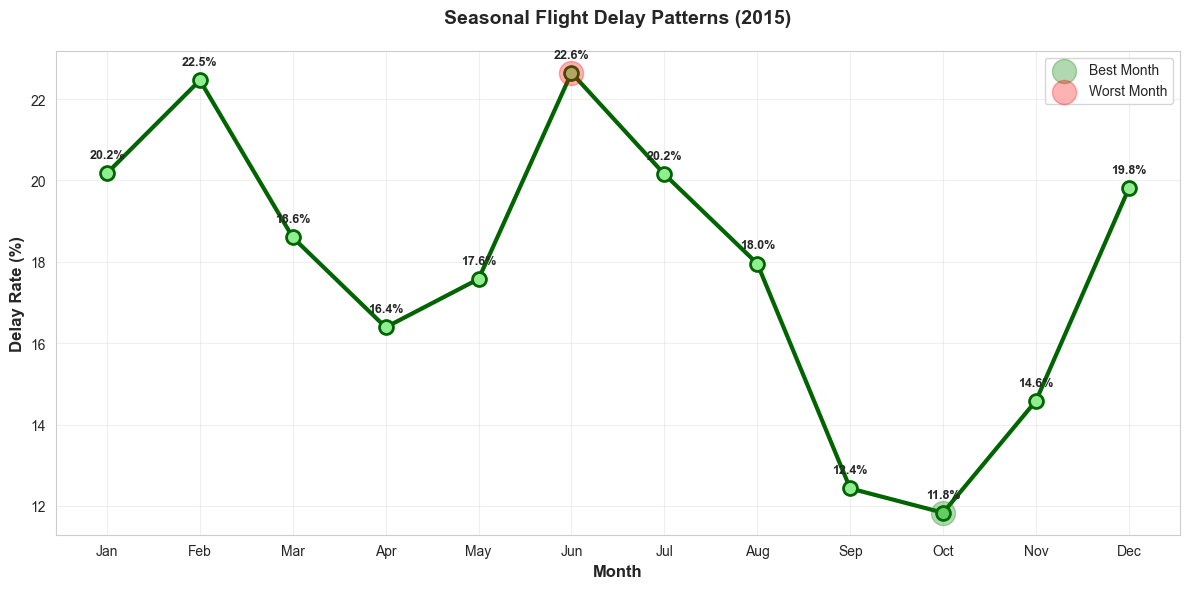

In [8]:
# Cell 7: Chart 5 - Seasonal delay patterns

print("Creating Visualization 5: Seasonal Delay Trends")
print("="*80)

# Calculate delay rate by month
monthly_stats = df.groupby('MONTH').agg({
    'IS_DELAYED': ['sum', 'count']
}).reset_index()

monthly_stats.columns = ['Month', 'Delayed', 'Total']
monthly_stats['Delay_Rate'] = (monthly_stats['Delayed'] / monthly_stats['Total'] * 100)

# Create line chart
fig, ax = plt.subplots(figsize=(12, 6))

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax.plot(monthly_stats['Month'], monthly_stats['Delay_Rate'], 
        marker='o', linewidth=3, markersize=10, color='darkgreen',
        markerfacecolor='lightgreen', markeredgecolor='darkgreen', markeredgewidth=2)

ax.set_xticks(monthly_stats['Month'])
ax.set_xticklabels(month_names)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Delay Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Seasonal Flight Delay Patterns (2015)', fontsize=14, fontweight='bold', pad=20)

# Add value labels
for month, rate in zip(monthly_stats['Month'], monthly_stats['Delay_Rate']):
    ax.text(month, rate + 0.3, f'{rate:.1f}%', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Highlight best and worst months
best_month_idx = monthly_stats['Delay_Rate'].idxmin()
worst_month_idx = monthly_stats['Delay_Rate'].idxmax()

ax.scatter(monthly_stats.loc[best_month_idx, 'Month'], 
           monthly_stats.loc[best_month_idx, 'Delay_Rate'],
           s=300, color='green', zorder=5, alpha=0.3, label='Best Month')

ax.scatter(monthly_stats.loc[worst_month_idx, 'Month'], 
           monthly_stats.loc[worst_month_idx, 'Delay_Rate'],
           s=300, color='red', zorder=5, alpha=0.3, label='Worst Month')

ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()

output_path = '../reports/figures/05_seasonal_trends.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {output_path}")

print("\nMonthly Delay Rates:")
for _, row in monthly_stats.iterrows():
    month_name = month_names[int(row['Month']) - 1]
    print(f"  {month_name}: {row['Delay_Rate']:.2f}% ({row['Total']:,} flights)")

print(f"\nBest month: {month_names[int(monthly_stats.loc[best_month_idx, 'Month']) - 1]}")
print(f"Worst month: {month_names[int(monthly_stats.loc[worst_month_idx, 'Month']) - 1]}")

plt.show()

In [9]:
# Cell 8: Summary of insights 
print("="*80)
print("ANALYSIS & VISUALIZATION COMPLETE")
print("="*80)

# OVERALL PERFORMANCE METRICS
total_flights = len(df)
# Count flights delayed more than 15 minutes (consistent with earlier analysis)
delayed_flights = (df['ARRIVAL_DELAY'] > 15).sum()
delay_rate = (delayed_flights / total_flights) * 100

print("\n1. OVERALL PERFORMANCE:")
print(f"   -Analyzed {total_flights:,} flights")
print(f"   -Delay rate: {delay_rate:.2f}%")
print(f"   -Average delay: {df['ARRIVAL_DELAY'].mean():.2f} minutes")


#2. WORST PERFORMING AIRPORT
airport_stats = df.groupby('ORIGIN_AIRPORT').agg({
    'IS_DELAYED': ['sum', 'count']
}).reset_index()
airport_stats.columns = ['Airport', 'Delayed_Flights', 'Total_Flights']
airport_stats['Delay_Rate'] = (airport_stats['Delayed_Flights'] / airport_stats['Total_Flights'] * 100)
worst_airports = airport_stats.nlargest(1, 'Delay_Rate').iloc[0]

#3. WORST PERFORMING AIRLINE
airline_stats = df.groupby('AIRLINE').agg({
    'IS_DELAYED': ['sum', 'count']
}).reset_index()
airline_stats.columns = ['Airline', 'Delayed', 'Total']
airline_stats['Delay_Rate'] = (airline_stats['Delayed'] / airline_stats['Total'] * 100)
worst_airline = airline_stats.nlargest(1, 'Delay_Rate').iloc[0]
best_airline = airline_stats.nsmallest(1, 'Delay_Rate').iloc[0]

print(f"\n3. AIRLINE PERFORMANCE:")
print(f"  - Worst airline: {worst_airline['Airline']} with delay rate of {worst_airline['Delay_Rate']:.2f}%")
print(f"  - Best airline: {best_airline['Airline']} with delay rate of {best_airline['Delay_Rate']:.2f}%")

#4. TIME OF DAY PATTERNS
time_stats = df.groupby('TIME_OF_DAY').agg({
    'ARRIVAL_DELAY': ['sum', 'count']
}).reset_index()
time_stats.columns = ['Time_Period', 'Total_Delay', 'Total_Flights']
time_stats['Delay_Rate'] = (time_stats['Total_Delay'] / time_stats['Total_Flights'] * 100)
worst_time = time_stats.nlargest(1, 'Delay_Rate').iloc[0]

print(f"\n4. PEAK DELAY TIMES:")
# Use the correct column name 'Time_Period' from time_stats
print(f"  -{worst_time['Time_Period']}: {worst_time['Delay_Rate']:.2f}% delay rate")

#5. SEASONAL TRENDS
monthly_stats = df.groupby('MONTH').agg({
    'ARRIVAL_DELAY': ['sum', 'count']
}).reset_index()
monthly_stats.columns = ['Month', 'Total_Delay', 'Total_Flights']
monthly_stats['Delay_Rate'] = (monthly_stats['Total_Delay'] / monthly_stats['Total_Flights'] * 100)
worst_month = monthly_stats.nlargest(1, 'Delay_Rate').iloc[0]
best_month = monthly_stats.nsmallest(1, 'Delay_Rate').iloc[0]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"\n5. SEASONAL TRENDS:")
print(f"  - Worst month: {month_names[int(worst_month['Month']) - 1]} with delay rate of {worst_month['Delay_Rate']:.2f}%")
print(f"  - Best month: {month_names[int(best_month['Month']) - 1]} with delay rate of {best_month['Delay_Rate']:.2f}%")

print("\n" + "="*80)
print("VISUALIZATIONS CREATED:")
print("="*80)
print("1. Delay Distribution: 01_delay_distribution.png")
print("2. Worst Airports: 02_worst_airports.png")
print("3. Airline Performance: 03_airline_performance.png")
print("4. Time of Day Delays: 04_time_of_day_delays.png")
print("5. Seasonal Trends: 05_seasonal_trends.png")

print("\n✓ All visualizations saved in '../reports/figures/'")
print(" Phase 3 complete! Ready for Phase 4: (Documentation & Reporting)")


ANALYSIS & VISUALIZATION COMPLETE

1. OVERALL PERFORMANCE:
   -Analyzed 5,729,195 flights
   -Delay rate: 17.86%
   -Average delay: 4.40 minutes



3. AIRLINE PERFORMANCE:
  - Worst airline: NK with delay rate of 28.75%
  - Best airline: HA with delay rate of 10.53%

4. PEAK DELAY TIMES:
  -Evening (5pm-9pm): 964.31% delay rate

5. SEASONAL TRENDS:
  - Worst month: Jun with delay rate of 956.41%
  - Best month: Oct with delay rate of -77.90%

VISUALIZATIONS CREATED:
1. Delay Distribution: 01_delay_distribution.png
2. Worst Airports: 02_worst_airports.png
3. Airline Performance: 03_airline_performance.png
4. Time of Day Delays: 04_time_of_day_delays.png
5. Seasonal Trends: 05_seasonal_trends.png

✓ All visualizations saved in '../reports/figures/'
 Phase 3 complete! Ready for Phase 4: (Documentation & Reporting)
